# Case 1 - Ville Kajander, Topias Paljakka and Ville Tuomi - 31.01.2020 - Helsinki Metropolia University of Applied Sciences

### Background
The first objective of this assignment was to learn to read csv data using Pandas function. Second objective was to create Keras neural network and test it with different variables. Third objective was to visualized results usin Matplotlib. The fourth objective was to learn to document the results.

### Data

Data set contains diagnosis of heart disease with 14 attributes and 303 instances of patient data.

#### Attributes:

- **age:** age in years

- **sex:** sex (1 = male; 0 = female)

- **cp:** chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
        
- **trestbps:** resting blood pressure (in mm Hg on admission to the hospital)

- **chol:** serum cholestoral in mg/dl

- **fbs:** (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)

- **restecg:** resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
                    
- **thalach:** maximum heart rate achieved

- **exang:** exercise induced angina (1 = yes; 0 = no)

- **oldpeak:** ST depression induced by exercise relative to rest

- **slope:** the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
        
- **ca:** number of major vessels (0-3) colored by flourosopy

- **thal:** 3 = normal; 6 = fixed defect; 7 = reversable defect

- **num:** diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)

#### Missing values:
The **ca** attribute had missing values on instances 167, 193, 288 and 303.

The **thal** attribute had missing values on instances 88 and 267.
***

Import libraries

In [1]:
%pylab inline
import pandas as pd
import tensorflow as tf
tf.__version__

Populating the interactive namespace from numpy and matplotlib


'2.0.0'

Get data from [source](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease) and assing column names.

In [2]:
names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, header=None, names=names)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


Select only attributes of numeric type from dataframe. (This also gets rid of missing values in **ca** and **thal**)

In [3]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df = df.select_dtypes(include=numerics)
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,1


Normalize dataframe

In [4]:
df = (df-df.min())/(df.max()-df.min())
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.00
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,0.50
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.25
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.00
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.00
5,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.0,0.816794,0.0,0.129032,0.0,0.00
6,0.687500,0.0,1.000000,0.433962,0.324201,0.0,1.0,0.679389,0.0,0.580645,1.0,0.75
7,0.583333,0.0,1.000000,0.245283,0.520548,0.0,0.0,0.702290,1.0,0.096774,0.0,0.00
8,0.708333,1.0,1.000000,0.339623,0.292237,0.0,1.0,0.580153,0.0,0.225806,0.5,0.50
9,0.500000,1.0,1.000000,0.433962,0.175799,1.0,1.0,0.641221,1.0,0.500000,1.0,0.25


#### Descriptive statistics:

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.529978,0.679868,0.719472,0.355564,0.275555,0.148515,0.495050,0.600055,0.326733,0.167678,0.300330,0.234323
std,0.188305,0.467299,0.320042,0.166035,0.118212,0.356198,0.497486,0.174618,0.469794,0.187270,0.308113,0.307134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.666667,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.000000,0.000000
50%,0.562500,1.000000,0.666667,0.339623,0.262557,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000
75%,0.666667,1.000000,1.000000,0.433962,0.340183,0.000000,1.000000,0.725191,1.000000,0.258065,0.500000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


***
### Models and training

Split dataframe to data and labels.

In [6]:
data = df.loc[:, :'slope']
labels = df.loc[:,'num']

Split data and labels further into training and test data $(4 : 1)$.

In [7]:
from sklearn.model_selection import train_test_split

# X = data, y = labels
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=False)

Method for building a model out of dataframe containing models layer structure.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def sequence(layers):
    model = Sequential()

    for index, row in layers.iterrows():
        
        args = row['args'].split(',')
        
        if row['type'] == 'Dense':
            if index==0:
                model.add(
                    Dense(int(args[0]), 
                    activation=None if len(args) == 1 else args[1],
                    input_shape=(X_train.shape[1],)))
            else:
                model.add(
                    Dense(int(args[0]), 
                    activation=None if len(args) == 1 else args[1]))
                          
        elif row['type'] == 'Dropout':
            model.add(Dropout(float(args[0])))
            
    return model

Make a dataframe containing models layer structure.

In [9]:
layers = pd.DataFrame(columns=['type', 'args'])
layers.loc[0] = ['Dense'] + ['2,relu']
layers.loc[1] = ['Dropout'] + ['0.3']
layers.loc[2] = ['Dense'] + ['8,relu']
layers.loc[3] = ['Dense'] + ['1']
layers

,type,args
0,Dense,"2,relu"
1,Dropout,0.3
2,Dense,"8,relu"
3,Dense,1


Define options to be used to train the model.

In [10]:
options = pd.Series([200, 10], index=['epochs','batch_size'])
options

epochs        200
batch_size     10
dtype: int64

Build and train model using the previously defined layers and options. Quarter of training data is used for validation.

In [11]:
model = sequence(layers)
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae', 'acc'])

history = model.fit(X_train, y_train, epochs=options['epochs'], batch_size=options['batch_size'], validation_split=0.25, verbose=0)

Method for smoothing the plotted results.

In [12]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

Get the current time for unique naming of saved results.

In [13]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("_%d%m%Y%H%M%S")
print("Current Time =", current_time)

Current Time = _31012020151123


Plot loss, MAE and accuracy to a single figure, along with the layers used in the model and the options used to fit it.

Save the figure as png for later viewing/comparing.

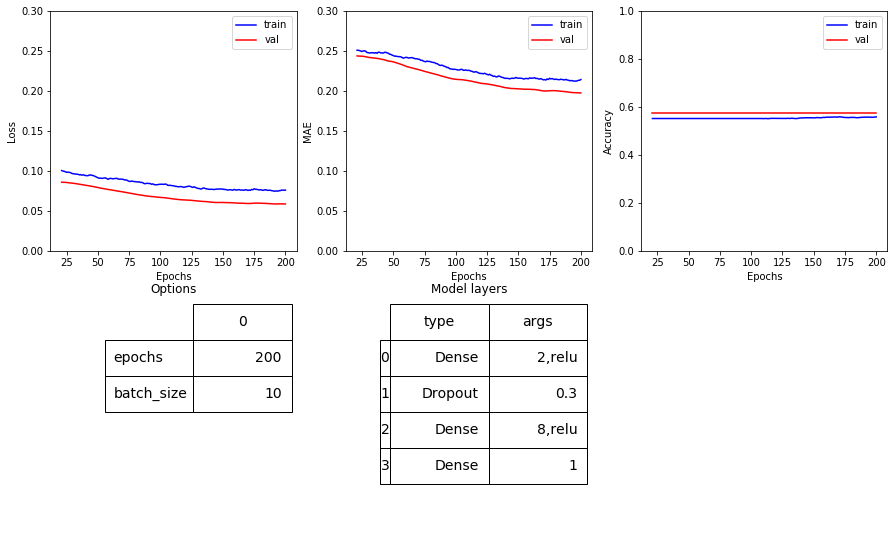

In [14]:
from pandas.plotting import table
import matplotlib.gridspec as gridspec

# Create 3x3 sub plots
gs = gridspec.GridSpec(3, 3)

# Create figure
plt.figure(figsize=(15,15))

# Table of models layer dataframe
ax = plt.subplot(gs[1, 1])
the_table = table(ax, layers, loc='best', colWidths=[0.2, 0.2, 0.2])
the_table.set_fontsize(14)
the_table.scale(2,3)
ax.axis('tight')
ax.axis('off')
ax.title.set_text('Model layers')

# Table of training options
ax = plt.subplot(gs[1, 0])
the_table = table(ax, options, loc='best', colWidths=[0.2, 0.2, 0.2])
the_table.set_fontsize(14)
the_table.scale(2,3)
ax.axis('tight')
ax.axis('off')
ax.title.set_text('Options')

N = 20 # number of dropped epochs from start
time = range(1, len(history.history['loss'])+1) # epochs

# Plot of loss and val_loss
ax = plt.subplot(gs[0, 0])
ax.plot(time[N:], smooth_curve(history.history['loss'][N:]), 'b-')
ax.plot(time[N:], smooth_curve(history.history['val_loss'][N:]), 'r-')
ax.set(xlabel='Epochs', ylabel='Loss')
ax.legend(['train', 'val'])
ax.set_ylim(0, 0.3)

# Plot of mae and val_mae
ax = plt.subplot(gs[0, 1])
ax.plot(time[N:], smooth_curve(history.history['mae'][N:]), 'b-')
ax.plot(time[N:], smooth_curve(history.history['val_mae'][N:]), 'r-')
ax.set(xlabel='Epochs', ylabel='MAE')
ax.legend(['train', 'val'])
ax.set_ylim(0, 0.3)

# Plot of acc and val_acc
ax = plt.subplot(gs[0, 2])
ax.plot(time[N:], smooth_curve(history.history['acc'][N:]), 'b-')
ax.plot(time[N:], smooth_curve(history.history['val_acc'][N:]), 'r-')
ax.set(xlabel='Epochs', ylabel='Accuracy')
ax.legend(['train', 'val'])
ax.set_ylim(0, 1)

# Save the figure to 'Case 1 plots'-folder in the same directory as this notebook
plt.savefig('Case 1 plots/plot'+current_time+'.png')

# Show the figure
plt.show()

Evaluate the test data using the trained model.

In [15]:
# Test the model with new unseen data

model.evaluate(X_test, y_test)

61/61 [==============================] - 0s 95us/sample - loss: 0.0591 - mae: 0.1979 - acc: 0.4754


[0.059118604256969985, 0.19788007, 0.47540984]

### Result



<table>
    <tr>
        <td><img src="Case 1 plots/plot_30012020141422.png" width="1500px"></td>
        <td><img src="Case 1 plots/plot_30012020141733.png" width="1500px"></td>
    </tr>
    <tr>
        <td><img src="Case 1 plots/plot_30012020141850.png" width="1500px"></td>
        <td><img src="Case 1 plots/plot_30012020142454.png" width="1500px"></td>
    </tr>    
</table>
<table>
    <tr>
        <td><img src="Case 1 plots/plot_30012020143849.png" width="2000px"></td>
    </tr>
    <tr>
        <td><img src="Case 1 plots/plot_30012020144214.png" width="2000px"></td>
    </tr>
</table>

### Conclusion

